In [ ]:
!git clone -b dev https://github.com/motazsaad/infant-cry-care.git

Cloning into 'infant-cry-care'...
remote: Enumerating objects: 15578, done.
remote: Total 15578 (delta 0), reused 0 (delta 0), pack-reused 15578
Receiving objects: 100% (15578/15578), 674.01 MiB | 42.87 MiB/s, done.
Resolving deltas: 100% (548/548), done.
Checking out files: 100% (30487/30487), done.


In [ ]:
! cp -R infant-cry-care/infant-cry-dataset/img_data/ ./

In [ ]:
import glob
import subprocess
import os
import pandas as pd
import librosa 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from gspread_dataframe import set_with_dataframe
import IPython.display as ipd
import tensorflow as tf
import pickle
import numpy as np
from keras.preprocessing import image
import cv2
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

# classess = ['lower gas', 'burp up', 'normal','pain','asphyxia', 'Uncomfortable', 'Sleepy'] 
classes = ['hunger', 'normal', 'lower gas', 'asphyxia']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import glob
# train_files = glob.glob( mainPath +'img_data/val/*/*.wav', recursive=True)
train_datagen = ImageDataGenerator()
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CryCareDataset/ChillantoDataset_3parts_img_data/train',
                                                 target_size = (256, 256),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')
val_datagen = ImageDataGenerator()
val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/CryCareDataset/ChillantoDataset_3parts_img_data/val',
                                            target_size = (256, 256),
                                            batch_size = 64,
                                            class_mode = 'categorical'
                                          )
test_datagen = ImageDataGenerator()
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CryCareDataset/ChillantoDataset_3parts_img_data/test',
                                            target_size = (256, 256),
                                            batch_size = 64,
                                            class_mode = 'categorical'
                                          )

Found 835 images belonging to 3 classes.
Found 179 images belonging to 3 classes.
Found 197 images belonging to 4 classes.


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', mode ="min", patience = 2, min_delta=0.001, restore_best_weights = True)  
cnn = tf.keras.models.Sequential()
print("Building Neural Network.....")
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=[256, 256, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=4, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=4, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=4, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=4, activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())
# cnn.add(tf.keras.layers.Dense(units=2000, activation='relu'))
# cnn.add(tf.keras.layers.Dropout(0.7))

cnn.add(tf.keras.layers.Dense(units=900, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=700, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.3))
cnn.add(tf.keras.layers.Dense(units=500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
cnn.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
print("Training cnn")

#######
logFile='/content/drive/MyDrive/CryCareDataset/CNN_ChillantoDataset_3classes_2.csv'
history_logger=tf.keras.callbacks.CSVLogger(logFile, separator=",", append=True)
history = cnn.fit(x = train_set, validation_data = val_set, epochs = 17, callbacks=[early_stopping,history_logger])

Building Neural Network.....
Training cnn
Epoch 1/17
14/14 [==============================] - 86s 6s/step - loss: 10.2843 - accuracy: 0.4455 - val_loss: 1.9819 - val_accuracy: 0.6425
Epoch 2/17
14/14 [==============================] - 81s 6s/step - loss: 2.8279 - accuracy: 0.5461 - val_loss: 0.9087 - val_accuracy: 0.5140
Epoch 3/17
14/14 [==============================] - 83s 6s/step - loss: 1.1671 - accuracy: 0.5940 - val_loss: 0.6074 - val_accuracy: 0.7598
Epoch 4/17
14/14 [==============================] - 84s 6s/step - loss: 0.7943 - accuracy: 0.6683 - val_loss: 0.5504 - val_accuracy: 0.8101
Epoch 5/17
14/14 [==============================] - 82s 6s/step - loss: 0.6762 - accuracy: 0.7114 - val_loss: 0.4568 - val_accuracy: 0.8547
Epoch 6/17
14/14 [==============================] - 82s 6s/step - loss: 0.5661 - accuracy: 0.7461 - val_loss: 0.4073 - val_accuracy: 0.8436
Epoch 7/17
14/14 [==============================] - 81s 6s/step - loss: 0.4951 - accuracy: 0.8096 - val_loss: 0.3502 

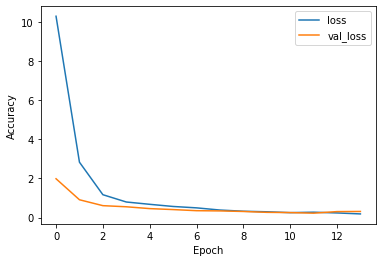

In [ ]:
import matplotlib.pyplot as plt
import pickle

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='upper right')
filename = '/content/drive/MyDrive/CryCareDataset/cnn_chillinto_3classes_2.sav'
pickle.dump(cnn, open(filename, 'wb'))

In [ ]:
import pickle
# from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
import librosa 
import matplotlib.pyplot as plt
import numpy as np
from pydantic import BaseModel


# classes=['Sleepy','Uncomfortable','asphyxia','burp up','lower gas','normal','pain']

In [ ]:
classesCNN = ['asphyxia', 'hunger', 'normal']
def predict(audio_path):
  audiofile, sr = librosa.load(audio_path, sr = 11025, mono = True)
  r = plt.specgram(audiofile, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap='CMRmap', sides='default', mode='default', scale='dB')
  plt.axis('off')
  # name = audiofile.split('/')[-1]
  # filaname = f'{mainPath}predictedImage/{name[:-3].replace(".", "")}.png'
  img_file = 'img.png' # everytime overwrite same file name
  plt.savefig(img_file, backend=None)

  my_image = load_img(img_file, target_size=(256, 256))
  my_image = img_to_array(my_image)
  my_image = np.expand_dims(my_image, axis=0)
  # my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
  # my_image = preprocess_input(my_image) # produce wrong classes 

  y = cnn.predict(my_image)
  # print(y)
  predicted_class = np.argmax(np.round(y),axis=1)[0]
  # print(predicted_class)
  return classesCNN[predicted_class]
  # return {
  #     "label" : classes[predicted_class]
  #     }

In [ ]:
import glob
test_files = glob.glob('/content/drive/MyDrive/CryCareDataset/ChillantoDataset_3parts/test/*/*.wav', recursive=True)

In [ ]:
test_labels = [fname.split('/')[-2] for fname in test_files]

In [ ]:
import pandas as pd 
test_df = pd.DataFrame({'wav_file': test_files, 'label': test_labels})
test_df.count()

wav_file    183
label       183
dtype: int64

1/1 [==============================] - 0s 46ms/step


,wav_file,label,prediction
0,/content/drive/MyDrive/CryCareDataset/Chillant...,hunger,hunger
1,/content/drive/MyDrive/CryCareDataset/Chillant...,hunger,hunger
2,/content/drive/MyDrive/CryCareDataset/Chillant...,hunger,hunger
3,/content/drive/MyDrive/CryCareDataset/Chillant...,hunger,hunger
4,/content/drive/MyDrive/CryCareDataset/Chillant...,hunger,hunger
...,...,...,...
178,/content/drive/MyDrive/CryCareDataset/Chillant...,asphyxia,asphyxia
179,/content/drive/MyDrive/CryCareDataset/Chillant...,asphyxia,asphyxia
180,/content/drive/MyDrive/CryCareDataset/Chillant...,asphyxia,asphyxia
181,/content/drive/MyDrive/CryCareDataset/Chillant...,asphyxia,hunger


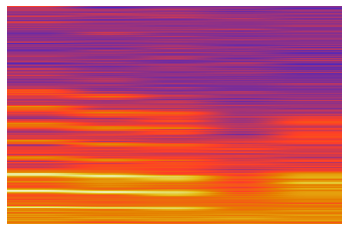

In [ ]:
test_df['prediction'] = test_df['wav_file'].apply(predict)
test_df

In [ ]:
test_df.prediction.value_counts().to_frame()
# print(test_set.class_indices)
# print(train_set.class_indices)

,prediction
normal,63
asphyxia,61
hunger,59


In [ ]:
report = classification_report(test_df['prediction'],test_df['label'],output_dict=True)
df = pd.DataFrame(report)
df

,asphyxia,hunger,normal,accuracy,macro avg,weighted avg
precision,0.980769,0.981481,0.818182,0.912568,0.926811,0.925026
recall,0.836066,0.898305,1.000000,0.912568,0.911457,0.912568
f1-score,0.902655,0.938053,0.900000,0.912568,0.913569,0.913153
support,61.000000,59.000000,63.000000,0.912568,183.000000,183.000000
